In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]

In [4]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,homeTeam,awayTeam,score,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154
1,1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054
2,2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,100
3,3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045
4,4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,375,2019-05-18,Levante,Ath Madrid,0.0,2,0,0,0,1.139073,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,11475
6021,376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,1,0,0,1.625551,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,100
6022,377,2019-05-18,Valladolid,Valencia,2.0,2,2,0,0,0.864865,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,100
6023,378,2019-05-19,Eibar,Barcelona,0.0,0,1,1,0,1.246696,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,100


In [ ]:
train_columns={'win_cons_home':train_csv.win_cons_home,'win_cons_away':train_csv.win_cons_away,'lose_cons_home':train_csv.lose_cons_home,'lose_cons_away':train_csv.lose_cons_away,'puissance_HomeTeam':train_csv.puissance_HomeTeam,'puissance_AwayTeam':train_csv.puissance_AwayTeam}
df = pd.DataFrame(train_columns)
X = df.values
X

In [145]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_FullTime','goalAwayTeam_FullTime','win_cons_home','win_cons_away','lose_cons_home','lose_cons_away','puissance_homeTeam','puissance_awayTeam'],axis=1).values
Y = Y[:,1:]
# Y = train_csv['score'].values
# X[0]
X

array([[   -1,    -1,    -1,    -1,  2409,  6154],
       [   -1,    -1,    -1,    -1,  4008,  3054],
       [   -1,    -1,    -1,    -1,  3029,   100],
       ...,
       [    1,     0,     0,     0,  9221,  6821],
       [    2,     2,     0,     0,  9495,  7276],
       [    1,     0,     0,     0, 14695,  9329]], dtype=int64)

In [146]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032, 2)


In [147]:
x_train

array([[    5,     0,     0,     0,  9495,  3054],
       [    1,     0,     0,     1,  1932,  7928],
       [    0,     0,     3,     0,  6273,  7881],
       ...,
       [    0,     0,     0,     3,  8832,  2705],
       [    1,     0,     0,     1,  5188,  2482],
       [    0,     0,     1,     1, 13105,  4257]], dtype=int64)

In [148]:
def create_model():
    
#     model = Sequential()
#     model.add(Dense(6, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(6, activation='softmax'))
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
    
    model = Sequential()
    model.add(Dense(2, input_dim=6, activation="relu"))
    model.add(Dense(2,activation = "softmax"))
    model.compile(loss="mse", optimizer="adam")
    return model

In [149]:
model = create_model()
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 6         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 0s 318us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 2/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 3/200
1032/1032 [==============================] - 0s 34us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 4/200
1032/1032 [==============================] - 0s 35us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 5/200
1032/1032 [==============================] - 0s 35us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 6/200
1032/1032 [==============================] - 0s 34us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 7/200
1032/1032 [==============================] - 0s 38us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 8/200
1032/1032 [==============================] - 0s 43us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 9/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7868 - val_loss: 0.822

1032/1032 [==============================] - 0s 30us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 154/200
1032/1032 [==============================] - 0s 30us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 155/200
1032/1032 [==============================] - 0s 46us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 156/200
1032/1032 [==============================] - 0s 35us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 157/200
1032/1032 [==============================] - 0s 31us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 158/200
1032/1032 [==============================] - 0s 35us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 159/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 160/200
1032/1032 [==============================] - 0s 32us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 161/200
1032/1032 [==============================] - 0s 32us/sample - loss: 0.7868 - val_loss: 0.8224
Epoch 162/200
1032/1032 [=================

In [151]:
ypred = model.predict(x_test)
print("y1 MSE:%.4f" % mean_squared_error(y_test[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(y_test[:,1], ypred[:,1]))

y1 MSE:0.8842
y2 MSE:0.7606


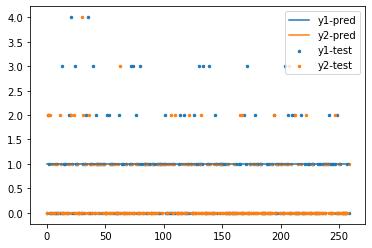

In [152]:
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, y_test[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

In [153]:
predictions = model.predict((x_test, y_test))

In [170]:
print(x_test[255])
print(y_test[255])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[255])
# np.argmax(predictions[98])

[   0    0    1    2 4146 7311]
[0 0]
[1. 0.]


## Prédiction Unique mi-temps

In [155]:
puissance_homeTeam = 0
puissance_awayTeam = 4523998
win_cons_home = -1
win_cons_away = -1
lose_cons_home = -1
lose_cons_away= -1
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
predictions1

array([[1., 0.]], dtype=float32)

In [156]:
unique = train_csv.values
goalHHalf_time = []
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    goal = predictions1
    goalHHalf_time.append(goal)
    print(goal,puissance_homeTeam,puissance_awayTeam)


[[1. 0.]] 2409 6154
[[1. 0.]] 4008 3054
[[1. 0.]] 3029 100
[[1. 0.]] 2803 2045
[[1. 0.]] 2156 1065
[[1. 0.]] 2690 2298
[[1. 0.]] 100 3749
[[1. 0.]] 4207 3029
[[1. 0.]] 3627 1736
[[1. 0.]] 9495 2020
[[1. 0.]] 6154 2690
[[1. 0.]] 3029 4008
[[1. 0.]] 2298 3029
[[1. 0.]] 1065 100
[[1. 0.]] 2020 2803
[[1. 0.]] 1736 2409
[[1. 0.]] 2045 4207
[[1. 0.]] 3749 2156
[[1. 0.]] 3054 3627
[[1. 0.]] 100 9495
[[1. 0.]] 2156 3054
[[1. 0.]] 2690 1736
[[1. 0.]] 100 2298
[[1. 0.]] 2045 3029
[[1. 0.]] 2409 2020
[[1. 0.]] 3627 100
[[1. 0.]] 9495 1065
[[1. 0.]] 3029 6154
[[1. 0.]] 4207 3749
[[1. 0.]] 2803 4008
[[1. 0.]] 1736 9495
[[1. 0.]] 6154 2298
[[1. 0.]] 1065 2045
[[1. 0.]] 2690 100
[[1. 0.]] 3029 3029
[[1. 0.]] 2020 2156
[[1. 0.]] 100 2803
[[1. 0.]] 3054 4207
[[1. 0.]] 3627 2409
[[1. 0.]] 4008 3749
[[1. 0.]] 4207 2690
[[1. 0.]] 2045 6154
[[1. 0.]] 9495 3627
[[1. 0.]] 3029 2803
[[1. 0.]] 2298 1736
[[1. 0.]] 2156 100
[[1. 0.]] 100 2020
[[1. 0.]] 3029 3054
[[1. 0.]] 3749 1065
[[1. 0.]] 2409 4008
[[1. 0.]] 

[[1. 0.]] 5188 3982
[[1. 0.]] 4146 2482
[[1. 0.]] 3781 10390
[[1. 0.]] 7311 2705
[[1. 0.]] 7151 6821
[[1. 0.]] 5188 2817
[[1. 0.]] 8832 1553
[[1. 0.]] 2956 1880
[[1. 0.]] 14695 3982
[[1. 0.]] 3883 3890
[[1. 0.]] 7938 2512
[[1. 0.]] 3982 8832
[[1. 0.]] 6821 3781
[[1. 0.]] 2817 4146
[[1. 0.]] 2482 14695
[[1. 0.]] 10390 7151
[[1. 0.]] 1553 5188
[[1. 0.]] 3890 2956
[[1. 0.]] 1880 3883
[[1. 0.]] 2512 7311
[[1. 0.]] 2705 7938
[[1. 0.]] 14695 2817
[[1. 0.]] 8832 2482
[[1. 0.]] 3883 1553
[[1. 0.]] 5188 1880
[[1. 0.]] 3781 3890
[[1. 0.]] 2956 2705
[[1. 0.]] 7311 6821
[[1. 0.]] 7151 3982
[[1. 0.]] 7938 10390
[[1. 0.]] 4146 2512
[[1. 0.]] 3982 7938
[[1. 0.]] 1553 2956
[[1. 0.]] 3890 4146
[[1. 0.]] 1880 7311
[[1. 0.]] 2512 3883
[[1. 0.]] 2482 3781
[[1. 0.]] 10390 5188
[[1. 0.]] 2817 7151
[[1. 0.]] 6821 8832
[[1. 0.]] 6821 2512
[[1. 0.]] 1553 1880
[[1. 0.]] 8832 2956
[[1. 0.]] 3982 3781
[[1. 0.]] 3883 2817
[[1. 0.]] 4146 2705
[[1. 0.]] 2482 7938
[[1. 0.]] 7151 3890
[[1. 0.]] 5188 14695
[[1. 0.]] 73

[[1. 0.]] 5396 100
[[1. 0.]] 4257 8949
[[1. 0.]] 3861 7427
[[1. 0.]] 100 9319
[[1. 0.]] 2679 100
[[1. 0.]] 3100 4490
[[1. 0.]] 6735 1932
[[1. 0.]] 2588 6846
[[1. 0.]] 2866 1140
[[1. 0.]] 3817 3086
[[1. 0.]] 2280 100
[[1. 0.]] 2242 7928
[[1. 0.]] 9035 1781
[[1. 0.]] 100 2242
[[1. 0.]] 4490 1140
[[1. 0.]] 9319 100
[[1. 0.]] 6846 6735
[[1. 0.]] 3100 100
[[1. 0.]] 7928 3817
[[1. 0.]] 2866 9035
[[1. 0.]] 1932 2679
[[1. 0.]] 3086 2588
[[1. 0.]] 1781 2280
[[1. 0.]] 2679 9319
[[1. 0.]] 100 2588
[[1. 0.]] 9035 3100
[[1. 0.]] 1932 7928
[[1. 0.]] 100 2866
[[1. 0.]] 1140 100
[[1. 0.]] 2242 6846
[[1. 0.]] 6735 3086
[[1. 0.]] 2280 4490
[[1. 0.]] 3817 1781
[[1. 0.]] 2866 1932
[[1. 0.]] 3100 1140
[[1. 0.]] 9319 2280
[[1. 0.]] 4490 9035
[[1. 0.]] 3086 2242
[[1. 0.]] 2588 3817
[[1. 0.]] 100 6735
[[1. 0.]] 1781 100
[[1. 0.]] 7928 2679
[[1. 0.]] 6846 100
[[1. 0.]] 2280 3100
[[1. 0.]] 1140 9319
[[1. 0.]] 6735 7928
[[1. 0.]] 100 2866
[[1. 0.]] 9035 6846
[[1. 0.]] 2679 2588
[[1. 0.]] 100 3086
[[1. 0.]] 1932 

[[1. 0.]] 14695 100
[[1. 0.]] 2929 100
[[1. 0.]] 13105 7276
[[1. 0.]] 3612 9035
[[1. 0.]] 9221 6562
[[1. 0.]] 4207 8164
[[1. 0.]] 100 2929
[[1. 0.]] 100 14695
[[1. 0.]] 7276 3612
[[1. 0.]] 9035 13105
[[1. 0.]] 6154 9221
[[1. 0.]] 6562 6351
[[1. 0.]] 8832 4207
[[1. 0.]] 8164 9770
[[1. 0.]] 100 7928
[[1. 0.]] 2478 10390
[[1. 0.]] 9495 3647
[[1. 0.]] 8036 8949
[[1. 0.]] 10885 6821
[[1. 0.]] 6497 100
[[1. 0.]] 8083 9319
[[1. 0.]] 9329 100
[[1. 0.]] 7276 9495
[[1. 0.]] 9329 14695
[[1. 0.]] 7928 9770
[[1. 0.]] 6821 9221
[[1. 0.]] 8832 10885
[[1. 0.]] 100 13105
[[1. 0.]] 8949 10390
[[1. 0.]] 6154 9319
[[1. 0.]] 9770 7928
[[1. 0.]] 9221 6821
[[1. 0.]] 9495 7276
[[1. 0.]] 14695 9329


In [141]:
predictions1[0][0]

1.0

In [165]:
res_csv = {'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'homeTeam':train_csv.homeTeam,'AwayTeam':train_csv.awayTeam,'goalHomeTeam_HalfTime':predictions1[0][0],'goalAwayTeam_HalfTime':predictions1[0][1]}

In [166]:
df = pd.DataFrame(res_csv)
df

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime
0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,1.0,0.0
1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,1.0,0.0
2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,1.0,0.0
3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,0.0
4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,1.0,0.0
...,...,...,...,...,...,...,...
1286,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,0.0
1287,2020-03-10,95,102,Valencia CF,Atalanta BC,1.0,0.0
1288,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,0.0
1289,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,0.0


In [ ]:
# X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
# X = X[:,1:]
# Y = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_FullTime','goalAwayTeam_FullTime','win_cons_home','win_cons_away','lose_cons_home','lose_cons_away','puissance_homeTeam','puissance_awayTeam'],axis=1).values
# Y = Y[:,1:]